In [1]:
from sklearn.datasets import load_boston
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# load sklearn dataset
data=pd.read_csv(r'E:\My Drive\UNSW-NB15 Dataset\StabdardizedDatasetXY\UNSW-NB15_1NN_50F_OneHote.csv', low_memory=False)

In [3]:
data.head()

,Unnamed: 0,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,...,Fuzzers,Analysis,Backdoors,DoS,Exploits,Generic,Normal,Reconnaissance,Shellcode,Worms
0,0,0.036133,528,304,31,29,0,0,87676.08594,50480.17188,...,0,0,0,0,0,0,1,0,0,0
1,1,0.001119,146,178,31,29,0,0,521894.53130,636282.37500,...,0,0,0,0,0,0,1,0,0,0
2,2,0.001209,132,164,31,29,0,0,436724.56250,542597.18750,...,0,0,0,0,0,0,1,0,0,0
3,3,0.001169,146,178,31,29,0,0,499572.25000,609067.56250,...,0,0,0,0,0,0,1,0,0,0
4,4,0.078339,568,312,31,29,0,0,43503.23438,23896.14258,...,0,0,0,0,0,0,1,0,0,0


In [16]:
data=data.drop(['Unnamed: 0'],axis=1)

In [17]:
data.shape

(700000, 50)

In [18]:
# Balance Dataset into Normal and Abnormal

In [19]:
data_normal=data.loc[data['Normal']==1]

In [137]:
data_normal=data_normal[['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload',
       'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Normal',' Fuzzers',
       'Analysis', 'Backdoors', 'DoS', 'Exploits', 'Generic', 
       'Reconnaissance', 'Shellcode', 'Worms']]

In [138]:
data_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677785 entries, 0 to 677784
Data columns (total 50 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   dur               677785 non-null  float64
 1   sbytes            677785 non-null  int64  
 2   dbytes            677785 non-null  int64  
 3   sttl              677785 non-null  int64  
 4   dttl              677785 non-null  int64  
 5   sloss             677785 non-null  int64  
 6   dloss             677785 non-null  int64  
 7   Sload             677785 non-null  float64
 8   Dload             677785 non-null  float64
 9   Spkts             677785 non-null  int64  
 10  Dpkts             677785 non-null  int64  
 11  swin              677785 non-null  int64  
 12  dwin              677785 non-null  int64  
 13  stcpb             677785 non-null  int64  
 14  dtcpb             677785 non-null  int64  
 15  smeansz           677785 non-null  int64  
 16  dmeansz           67

In [139]:
data_normal.shape

(677785, 50)

In [140]:
data_normal.head()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,Normal,Fuzzers,Analysis,Backdoors,DoS,Exploits,Generic,Reconnaissance,Shellcode,Worms
0,0.036133,528,304,31,29,0,0,87676.08594,50480.17188,4,...,1,0,0,0,0,0,0,0,0,0
1,0.001119,146,178,31,29,0,0,521894.53130,636282.37500,2,...,1,0,0,0,0,0,0,0,0,0
2,0.001209,132,164,31,29,0,0,436724.56250,542597.18750,2,...,1,0,0,0,0,0,0,0,0,0
3,0.001169,146,178,31,29,0,0,499572.25000,609067.56250,2,...,1,0,0,0,0,0,0,0,0,0
4,0.078339,568,312,31,29,0,0,43503.23438,23896.14258,4,...,1,0,0,0,0,0,0,0,0,0


In [141]:
data_normal.columns

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload',
       'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Normal',
       ' Fuzzers', 'Analysis', 'Backdoors', 'DoS', 'Exploits', 'Generic',
       'Reconnaissance', 'Shellcode', 'Worms'],
      dtype='object')

In [142]:
data_normal=data_normal.to_csv(r'E:\My Drive\UNSW-NB15 Dataset\StabdardizedDatasetXY\UNSW-NB15_1NN_NormalWith10Targets_OneHot.csv')

In [143]:
data_anormal=data.loc[data['Normal']==0]

In [144]:
data_anormal.shape

(22215, 50)

In [145]:
data_anormal.columns

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload',
       'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', ' Fuzzers',
       'Analysis', 'Backdoors', 'DoS', 'Exploits', 'Generic', 'Normal',
       'Reconnaissance', 'Shellcode', 'Worms'],
      dtype='object')

In [146]:
data_anormal=data_anormal[['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload',
       'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Normal',' Fuzzers',
       'Analysis', 'Backdoors', 'DoS', 'Exploits', 'Generic', 
       'Reconnaissance', 'Shellcode', 'Worms']]

In [147]:
data_anormal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22215 entries, 19 to 186786
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dur               22215 non-null  float64
 1   sbytes            22215 non-null  int64  
 2   dbytes            22215 non-null  int64  
 3   sttl              22215 non-null  int64  
 4   dttl              22215 non-null  int64  
 5   sloss             22215 non-null  int64  
 6   dloss             22215 non-null  int64  
 7   Sload             22215 non-null  float64
 8   Dload             22215 non-null  float64
 9   Spkts             22215 non-null  int64  
 10  Dpkts             22215 non-null  int64  
 11  swin              22215 non-null  int64  
 12  dwin              22215 non-null  int64  
 13  stcpb             22215 non-null  int64  
 14  dtcpb             22215 non-null  int64  
 15  smeansz           22215 non-null  int64  
 16  dmeansz           22215 non-null  int6

In [148]:
data_anormal=data_anormal.to_csv(r'E:\My Drive\UNSW-NB15 Dataset\StabdardizedDatasetXY\UNSW-NB15_1NN_Anormalwith10targets_OneHot.csv')

# Drop 10 features from Normal dataset based on SFS

In [149]:
data_normal=pd.read_csv(r'E:\My Drive\UNSW-NB15 Dataset\StabdardizedDatasetXY\UNSW-NB15_1NN_NormalWith10Targets_OneHot.csv',low_memory=False)

In [150]:
data_normal.columns

Index(['Unnamed: 0', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
       'dloss', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb',
       'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit',
       'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack',
       'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm',
       'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'Normal', ' Fuzzers', 'Analysis', 'Backdoors', 'DoS', 'Exploits',
       'Generic', 'Reconnaissance', 'Shellcode', 'Worms'],
      dtype='object')

In [151]:
data_normal=data_normal.drop(['Unnamed: 0'],axis=1)

In [152]:
data_normal.columns

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload',
       'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Normal',
       ' Fuzzers', 'Analysis', 'Backdoors', 'DoS', 'Exploits', 'Generic',
       'Reconnaissance', 'Shellcode', 'Worms'],
      dtype='object')

In [153]:
data_normal.shape

(677785, 50)

In [156]:
#Select the first 40 columns as features 
X_1=data_normal.iloc[:,:40]
#Slecte the 41-50 columns as targets 
y_1=data_normal.iloc[:,40:41]

In [159]:
X_1

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,0.036133,528,304,31,29,0,0,8.767609e+04,5.048017e+04,4,...,0,0,0,2,4,2,3,1,1,2
1,0.001119,146,178,31,29,0,0,5.218945e+05,6.362824e+05,2,...,0,0,0,12,8,1,2,2,1,1
2,0.001209,132,164,31,29,0,0,4.367246e+05,5.425972e+05,2,...,0,0,0,6,9,1,1,1,1,1
3,0.001169,146,178,31,29,0,0,4.995722e+05,6.090676e+05,2,...,0,0,0,7,9,1,1,1,1,1
4,0.078339,568,312,31,29,0,0,4.350323e+04,2.389614e+04,4,...,0,0,0,2,4,2,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677780,0.020383,320,1874,31,29,1,2,1.047932e+05,6.436736e+05,6,...,0,0,0,8,20,7,5,1,1,4
677781,1.402957,19410,1087890,31,29,2,370,1.103783e+05,6.195098e+06,364,...,4,0,0,1,1,2,7,2,2,2
677782,0.007108,2158,2464,31,29,6,6,2.328644e+06,2.658413e+06,24,...,0,0,0,13,13,6,7,2,1,2
677783,0.004435,568,304,31,29,0,0,7.684329e+05,4.112740e+05,4,...,0,0,0,10,13,6,5,1,1,3


In [160]:
y_1

,Normal
0,1
1,1
2,1
3,1
4,1
...,...
677780,1
677781,1
677782,1
677783,1


In [161]:
X_1=X_1.to_csv(r'E:\My Drive\UNSW-NB15 Dataset\StabdardizedDatasetXY\UNSW-NB15_1NN_X_1_10cat_OneHot.csv')

In [162]:
# Normal Data Drop object features 

In [163]:
Data_normal_New=data_normal.drop(['Sload','dwin', 'stcpb','trans_depth','Djit','Sintpkt', 'Dintpkt','is_ftp_login','ct_src_dport_ltm'],axis=1)

In [164]:
Data_normal_New.shape

(677785, 41)

In [165]:
Data_normal_New.columns

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dtcpb', 'smeansz', 'dmeansz', 'res_bdy_len',
       'Sjit', 'Stime', 'Ltime', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'ct_ftp_cmd',
       'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Normal', ' Fuzzers', 'Analysis',
       'Backdoors', 'DoS', 'Exploits', 'Generic', 'Reconnaissance',
       'Shellcode', 'Worms'],
      dtype='object')

In [166]:
Data_normal_New=Data_normal_New.to_csv(r'E:\My Drive\UNSW-NB15 Dataset\StabdardizedDatasetXY\UNSW-NB15_1NN_Normal_new_with10targets_OneHot.csv')

In [167]:
Data_normal_New=pd.read_csv(r'E:\My Drive\UNSW-NB15 Dataset\StabdardizedDatasetXY\UNSW-NB15_1NN_Normal_new_with10targets_OneHot.csv')

In [168]:
Data_normal_New.columns

Index(['Unnamed: 0', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
       'dloss', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dtcpb', 'smeansz',
       'dmeansz', 'res_bdy_len', 'Sjit', 'Stime', 'Ltime', 'tcprtt', 'synack',
       'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Normal', ' Fuzzers', 'Analysis',
       'Backdoors', 'DoS', 'Exploits', 'Generic', 'Reconnaissance',
       'Shellcode', 'Worms'],
      dtype='object')

In [169]:
Data_normal_New.shape

(677785, 42)

In [170]:
Data_normal_New.head()

,Unnamed: 0,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Dload,Spkts,...,Normal,Fuzzers,Analysis,Backdoors,DoS,Exploits,Generic,Reconnaissance,Shellcode,Worms
0,0,0.036133,528,304,31,29,0,0,50480.17188,4,...,1,0,0,0,0,0,0,0,0,0
1,1,0.001119,146,178,31,29,0,0,636282.37500,2,...,1,0,0,0,0,0,0,0,0,0
2,2,0.001209,132,164,31,29,0,0,542597.18750,2,...,1,0,0,0,0,0,0,0,0,0
3,3,0.001169,146,178,31,29,0,0,609067.56250,2,...,1,0,0,0,0,0,0,0,0,0
4,4,0.078339,568,312,31,29,0,0,23896.14258,4,...,1,0,0,0,0,0,0,0,0,0


In [176]:
#Select the first 31 columns as features 
X_1=Data_normal_New.iloc[:,:31]
#Slecte the 41-50 columns as targets 
y_1=Data_normal_New.iloc[:,32:33]

In [177]:
X_1

,Unnamed: 0,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Dload,Spkts,...,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_dst_sport_ltm
0,0,0.036133,528,304,31,29,0,0,5.048017e+04,4,...,0.000000,0,0,0,0,2,4,2,3,1
1,1,0.001119,146,178,31,29,0,0,6.362824e+05,2,...,0.000000,0,0,0,0,12,8,1,2,1
2,2,0.001209,132,164,31,29,0,0,5.425972e+05,2,...,0.000000,0,0,0,0,6,9,1,1,1
3,3,0.001169,146,178,31,29,0,0,6.090676e+05,2,...,0.000000,0,0,0,0,7,9,1,1,1
4,4,0.078339,568,312,31,29,0,0,2.389614e+04,4,...,0.000000,0,0,0,0,2,4,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677780,677780,0.020383,320,1874,31,29,1,2,6.436736e+05,6,...,0.000197,0,0,0,0,8,20,7,5,1
677781,677781,1.402957,19410,1087890,31,29,2,370,6.195098e+06,364,...,0.000162,0,0,4,0,1,1,2,7,2
677782,677782,0.007108,2158,2464,31,29,6,6,2.658413e+06,24,...,0.000125,0,0,0,0,13,13,6,7,1
677783,677783,0.004435,568,304,31,29,0,0,4.112740e+05,4,...,0.000000,0,0,0,0,10,13,6,5,1


In [178]:
y_1

,Normal
0,1
1,1
2,1
3,1
4,1
...,...
677780,1
677781,1
677782,1
677783,1


In [260]:
#Select the first 40 columns as features 
X_1=Data_normal_New.iloc[:,:31]
#Slecte the 41-50 columns as targets 
y_1=Data_normal_New.iloc[:,32:42]

In [261]:
X_1

,Unnamed: 0,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Dload,Spkts,...,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_dst_sport_ltm
0,0,0.036133,528,304,31,29,0,0,5.048017e+04,4,...,0.000000,0,0,0,0,2,4,2,3,1
1,1,0.001119,146,178,31,29,0,0,6.362824e+05,2,...,0.000000,0,0,0,0,12,8,1,2,1
2,2,0.001209,132,164,31,29,0,0,5.425972e+05,2,...,0.000000,0,0,0,0,6,9,1,1,1
3,3,0.001169,146,178,31,29,0,0,6.090676e+05,2,...,0.000000,0,0,0,0,7,9,1,1,1
4,4,0.078339,568,312,31,29,0,0,2.389614e+04,4,...,0.000000,0,0,0,0,2,4,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677780,677780,0.020383,320,1874,31,29,1,2,6.436736e+05,6,...,0.000197,0,0,0,0,8,20,7,5,1
677781,677781,1.402957,19410,1087890,31,29,2,370,6.195098e+06,364,...,0.000162,0,0,4,0,1,1,2,7,2
677782,677782,0.007108,2158,2464,31,29,6,6,2.658413e+06,24,...,0.000125,0,0,0,0,13,13,6,7,1
677783,677783,0.004435,568,304,31,29,0,0,4.112740e+05,4,...,0.000000,0,0,0,0,10,13,6,5,1


In [262]:
y_1

,Normal,Fuzzers,Analysis,Backdoors,DoS,Exploits,Generic,Reconnaissance,Shellcode,Worms
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
677780,1,0,0,0,0,0,0,0,0,0
677781,1,0,0,0,0,0,0,0,0,0
677782,1,0,0,0,0,0,0,0,0,0
677783,1,0,0,0,0,0,0,0,0,0


# Load Anormal Dataset

In [179]:
data_anormal=pd.read_csv(r'E:\My Drive\UNSW-NB15 Dataset\StabdardizedDatasetXY\UNSW-NB15_1NN_Anormalwith10targets_OneHot.csv')

In [180]:
data_anormal.head()

,Unnamed: 0,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,...,Normal,Fuzzers,Analysis,Backdoors,DoS,Exploits,Generic,Reconnaissance,Shellcode,Worms
0,19,0.000021,728,0,254,0,0,0,1.386667e+08,0.000000,...,0,0,0,0,0,1,0,0,0,0
1,20,0.240139,918,25552,62,252,2,10,2.805042e+04,815794.187500,...,0,0,0,0,0,1,0,0,0,0
2,21,2.390390,1362,268,254,252,6,1,4.233619e+03,749.668518,...,0,0,0,0,0,0,0,1,0,0
3,38,0.175190,8168,268,254,252,4,1,3.463668e+05,10228.894530,...,0,0,0,0,0,1,0,0,0,0
4,39,0.190600,844,268,254,252,2,1,3.189927e+04,9401.888672,...,0,0,0,0,0,1,0,0,0,0


In [181]:
data_anormal.columns

Index(['Unnamed: 0', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
       'dloss', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb',
       'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit',
       'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack',
       'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm',
       'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'Normal', ' Fuzzers', 'Analysis', 'Backdoors', 'DoS', 'Exploits',
       'Generic', 'Reconnaissance', 'Shellcode', 'Worms'],
      dtype='object')

In [182]:
# Drop Anomaly Dataset into 31 Features also 
# Drop index 8, 13, 14, 18, 21, 24, 25, 32, 39, 40
Data_anormal_New=data_anormal.drop(['Sload','dwin', 'stcpb','trans_depth','Djit','Sintpkt', 'Dintpkt','is_ftp_login','ct_src_dport_ltm'],axis=1)

In [183]:
Data_anormal_New.shape

(22215, 42)

In [184]:
Data_anormal_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22215 entries, 0 to 22214
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        22215 non-null  int64  
 1   dur               22215 non-null  float64
 2   sbytes            22215 non-null  int64  
 3   dbytes            22215 non-null  int64  
 4   sttl              22215 non-null  int64  
 5   dttl              22215 non-null  int64  
 6   sloss             22215 non-null  int64  
 7   dloss             22215 non-null  int64  
 8   Dload             22215 non-null  float64
 9   Spkts             22215 non-null  int64  
 10  Dpkts             22215 non-null  int64  
 11  swin              22215 non-null  int64  
 12  dtcpb             22215 non-null  int64  
 13  smeansz           22215 non-null  int64  
 14  dmeansz           22215 non-null  int64  
 15  res_bdy_len       22215 non-null  int64  
 16  Sjit              22215 non-null  float6

In [125]:
Data_anormal_New.shape

(22215, 42)

In [126]:
Data_anormal_New.head()

,Unnamed: 0,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Dload,Spkts,...,Fuzzers,Analysis,Backdoors,DoS,Exploits,Generic,Normal,Reconnaissance,Shellcode,Worms
0,19,0.000021,728,0,254,0,0,0,0.000000,2,...,0,0,0,0,1,0,0,0,0,0
1,20,0.240139,918,25552,62,252,2,10,815794.187500,12,...,0,0,0,0,1,0,0,0,0,0
2,21,2.390390,1362,268,254,252,6,1,749.668518,14,...,0,0,0,0,0,0,0,1,0,0
3,38,0.175190,8168,268,254,252,4,1,10228.894530,14,...,0,0,0,0,1,0,0,0,0,0
4,39,0.190600,844,268,254,252,2,1,9401.888672,10,...,0,0,0,0,1,0,0,0,0,0


In [344]:
#Select the first 40 columns as features 
X_2=Data_anormal_New.iloc[:,:31]
#Slecte the 41-50 columns as targets 
y_2=Data_anormal_New.iloc[:,32:42]

In [345]:
X_2

,Unnamed: 0,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Dload,Spkts,...,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_dst_sport_ltm
0,19,0.000021,728,0,254,0,0,0,0.000000,2,...,0.000000,0,2,0,0,1,1,1,1,1
1,20,0.240139,918,25552,62,252,2,10,815794.187500,12,...,0.044947,0,1,1,0,3,2,2,1,1
2,21,2.390390,1362,268,254,252,6,1,749.668518,14,...,0.048129,0,1,1,0,5,2,2,1,1
3,38,0.175190,8168,268,254,252,4,1,10228.894530,14,...,0.046134,0,1,0,0,1,1,1,1,1
4,39,0.190600,844,268,254,252,2,1,9401.888672,10,...,0.044321,0,1,1,0,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22210,186497,31.461020,924,708,254,252,2,1,168.843857,16,...,0.051658,0,1,0,0,6,6,2,2,1
22211,186498,57.995934,1362,536,254,252,6,1,67.866829,20,...,0.062194,0,1,0,0,6,6,2,2,1
22212,186561,32.361782,1128,622,254,252,6,1,142.884598,18,...,0.000000,0,1,0,0,6,6,2,2,1
22213,186657,0.476639,470,354,254,252,1,1,6915.086426,8,...,0.000000,0,1,0,0,8,8,2,2,1


In [349]:
y_3=y_2.drop(['Normal'],axis=1)
y_3

,Fuzzers,Analysis,Backdoors,DoS,Exploits,Generic,Reconnaissance,Shellcode,Worms
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
22210,1,0,0,0,0,0,0,0,0
22211,1,0,0,0,0,0,0,0,0
22212,1,0,0,0,0,0,0,0,0
22213,1,0,0,0,0,0,0,0,0


In [351]:
y_3=np.array(y_3)
y_3

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

# PCA Dimensionality Reduciton Based on # 31 Feaures
# Normal Activity 

In [266]:
# Data stadanrdisation 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [267]:
X_1=np.array(X_1)
X_1

array([[0.00000e+00, 3.61330e-02, 5.28000e+02, ..., 2.00000e+00,
        3.00000e+00, 1.00000e+00],
       [1.00000e+00, 1.11900e-03, 1.46000e+02, ..., 1.00000e+00,
        2.00000e+00, 1.00000e+00],
       [2.00000e+00, 1.20900e-03, 1.32000e+02, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       ...,
       [6.77782e+05, 7.10800e-03, 2.15800e+03, ..., 6.00000e+00,
        7.00000e+00, 1.00000e+00],
       [6.77783e+05, 4.43500e-03, 5.68000e+02, ..., 6.00000e+00,
        5.00000e+00, 1.00000e+00],
       [6.77784e+05, 7.29740e-02, 4.23800e+03, ..., 6.00000e+00,
        7.00000e+00, 1.00000e+00]])

In [268]:
y_1=np.array(y_1)

In [413]:
X_2=np.array(X_2)
X_2

array([[1.9000000e+01, 2.1000000e-05, 7.2800000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [2.0000000e+01, 2.4013900e-01, 9.1800000e+02, ..., 2.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [2.1000000e+01, 2.3903900e+00, 1.3620000e+03, ..., 2.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       ...,
       [1.8656100e+05, 3.2361782e+01, 1.1280000e+03, ..., 2.0000000e+00,
        2.0000000e+00, 1.0000000e+00],
       [1.8665700e+05, 4.7663900e-01, 4.7000000e+02, ..., 2.0000000e+00,
        2.0000000e+00, 1.0000000e+00],
       [1.8678600e+05, 3.4343100e-01, 5.5000000e+02, ..., 3.0000000e+00,
        3.0000000e+00, 1.0000000e+00]])

In [414]:
y_2=np.array(y_2)

In [415]:
#Standardizing the features
X_1=StandardScaler().fit_transform(X_1)
X_1

array([[-1.73204825, -0.03101792, -0.32008321, ..., -0.58085128,
        -0.40326412, -0.26522393],
       [-1.73204314, -0.03234724, -0.34907416, ..., -0.84591164,
        -0.63999641, -0.26522393],
       [-1.73203803, -0.03234382, -0.35013666, ..., -0.84591164,
        -0.8767287 , -0.26522393],
       ...,
       [ 1.73203803, -0.03211986, -0.19637838, ...,  0.47939013,
         0.54366505, -0.26522393],
       [ 1.73204314, -0.03222134, -0.31704751, ...,  0.47939013,
         0.07020047, -0.26522393],
       [ 1.73204825, -0.02961924, -0.0385219 , ...,  0.47939013,
         0.54366505, -0.26522393]])

In [416]:
X_2=StandardScaler().fit_transform(X_2)
X_2

array([[-2.16659191e+00, -2.21783960e-01, -5.11621426e-02, ...,
        -8.73137816e-01, -9.49609188e-01, -7.57354139e-01],
       [-2.16657021e+00, -1.76506985e-01, -5.03742760e-02, ...,
        -4.34177995e-01, -9.49609188e-01, -7.57354139e-01],
       [-2.16654850e+00,  2.28947254e-01, -4.85331562e-02, ...,
        -4.34177995e-01, -9.49609188e-01, -7.57354139e-01],
       ...,
       [ 1.88225560e+00,  5.88039350e+00, -4.95034761e-02, ...,
        -4.34177995e-01, -5.85056539e-01, -7.57354139e-01],
       [ 1.88433925e+00, -1.31912225e-01, -5.22319825e-02, ...,
        -4.34177995e-01, -5.85056539e-01, -7.57354139e-01],
       [ 1.88713917e+00, -1.57030106e-01, -5.19002492e-02, ...,
         4.78182655e-03, -2.20503891e-01, -7.57354139e-01]])

In [273]:
# Normal Activity Data PCA Dimensionality Reduction 

In [274]:
#29 Features 
pca = PCA(n_components=29)
principalComponents_normal_29 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([1.77573336e-01, 1.27588849e-01, 9.88609306e-02, 8.27306201e-02,
       6.66178495e-02, 6.32244320e-02, 4.67641286e-02, 4.23164735e-02,
       3.63747992e-02, 3.22879840e-02, 3.03030042e-02, 2.85364168e-02,
       2.20819206e-02, 2.17278692e-02, 1.86883083e-02, 1.83982561e-02,
       1.57656680e-02, 1.46555663e-02, 1.15738451e-02, 9.82148346e-03,
       8.72082330e-03, 8.61442974e-03, 6.31274067e-03, 6.28411902e-03,
       3.83710818e-03, 1.97014293e-04, 1.13320108e-04, 2.06178502e-05,
       7.72220249e-06])

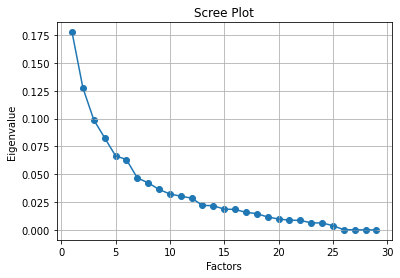

In [275]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,30),importance)
plt.plot(range(1,30),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

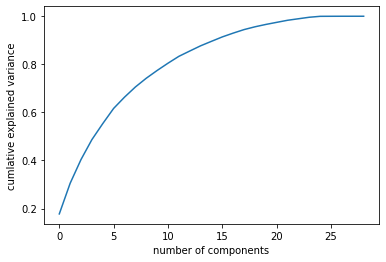

In [276]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [277]:
a=np.cumsum(pca.explained_variance_ratio_)
a

array([0.17757334, 0.30516219, 0.40402312, 0.48675374, 0.55337159,
       0.61659602, 0.66336015, 0.70567662, 0.74205142, 0.7743394 ,
       0.80464241, 0.83317882, 0.85526074, 0.87698861, 0.89567692,
       0.91407518, 0.92984085, 0.94449641, 0.95607026, 0.96589174,
       0.97461256, 0.98322699, 0.98953973, 0.99582385, 0.99966096,
       0.99985798, 0.9999713 , 0.99999191, 0.99999964])

In [202]:
# Feature 20

In [203]:
pca = PCA(n_components=20)
principalComponents_normal_20 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([0.17757334, 0.12758885, 0.09886093, 0.08273062, 0.06661785,
       0.06322443, 0.04676413, 0.04231647, 0.0363748 , 0.03228798,
       0.030303  , 0.02853642, 0.02208192, 0.02172787, 0.01868831,
       0.01839826, 0.01576567, 0.01465557, 0.01157385, 0.00982148])

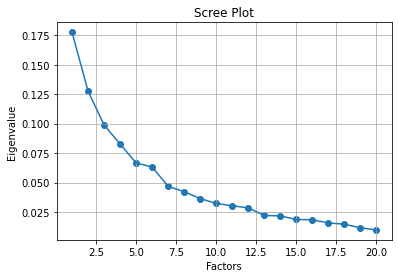

In [204]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,21),importance)
plt.plot(range(1,21),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

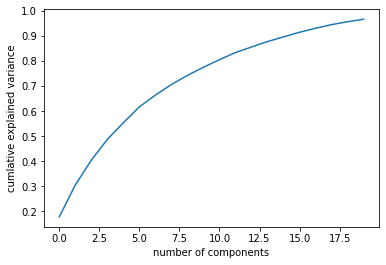

In [205]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [206]:
b=np.cumsum(pca.explained_variance_ratio_)
b

array([0.17757334, 0.30516219, 0.40402312, 0.48675374, 0.55337159,
       0.61659602, 0.66336015, 0.70567662, 0.74205142, 0.7743394 ,
       0.80464241, 0.83317882, 0.85526074, 0.87698861, 0.89567692,
       0.91407518, 0.92984085, 0.94449641, 0.95607026, 0.96589174])

In [207]:
# Normal Feature 18 

In [208]:
pca = PCA(n_components=18)
principalComponents_normal_18 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([0.17757334, 0.12758885, 0.09886093, 0.08273062, 0.06661785,
       0.06322443, 0.04676413, 0.04231647, 0.0363748 , 0.03228798,
       0.030303  , 0.02853642, 0.02208192, 0.02172787, 0.01868831,
       0.01839826, 0.01576567, 0.01465557])

In [209]:
print(principalComponents_normal_18.shape)

(677785, 18)


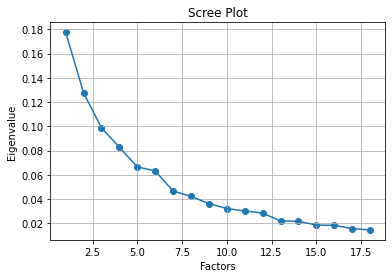

In [210]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,19),importance)
plt.plot(range(1,19),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

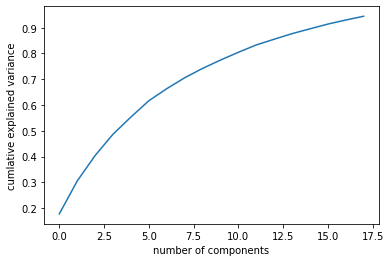

In [211]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [212]:
c=np.cumsum(pca.explained_variance_ratio_)
c

array([0.17757334, 0.30516219, 0.40402312, 0.48675374, 0.55337159,
       0.61659602, 0.66336015, 0.70567662, 0.74205142, 0.7743394 ,
       0.80464241, 0.83317882, 0.85526074, 0.87698861, 0.89567692,
       0.91407518, 0.92984085, 0.94449641])

In [213]:
# Normal Feature 15

In [214]:
pca = PCA(n_components=15)
principalComponents_normal_15 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([0.17757334, 0.12758885, 0.09886093, 0.08273062, 0.06661785,
       0.06322443, 0.04676413, 0.04231647, 0.0363748 , 0.03228798,
       0.030303  , 0.02853642, 0.02208192, 0.02172787, 0.01868831])

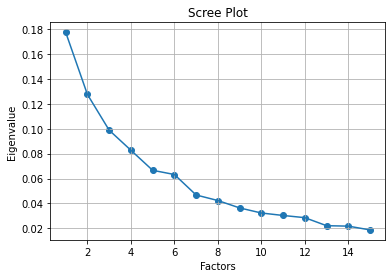

In [215]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,16),importance)
plt.plot(range(1,16),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

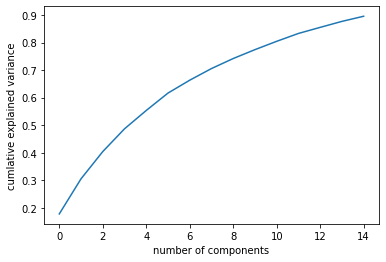

In [216]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [217]:
d=np.cumsum(pca.explained_variance_ratio_)
d

array([0.17757334, 0.30516219, 0.40402312, 0.48675374, 0.55337159,
       0.61659602, 0.66336015, 0.70567662, 0.74205142, 0.7743394 ,
       0.80464241, 0.83317882, 0.85526074, 0.87698861, 0.89567692])

In [218]:
#Normal Feature 9

In [219]:
pca = PCA(n_components=9)
principalComponents_normal_9 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([0.17757334, 0.12758885, 0.09886093, 0.08273062, 0.06661785,
       0.06322441, 0.04676411, 0.04231614, 0.03637348])

In [220]:
print(principalComponents_normal_9.shape)

(677785, 9)


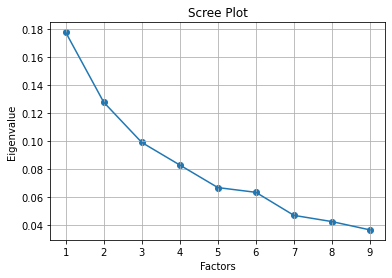

In [221]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,10),importance)
plt.plot(range(1,10),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

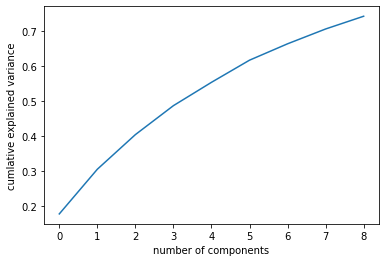

In [222]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [223]:
e=np.cumsum(pca.explained_variance_ratio_)
e

array([0.17757334, 0.30516219, 0.40402312, 0.48675373, 0.55337158,
       0.61659599, 0.6633601 , 0.70567624, 0.74204972])

In [ ]:
# 8 Features 

In [417]:
pca = PCA(n_components=8)
principalComponents_normal_8 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([0.17757334, 0.12758885, 0.09886093, 0.08273062, 0.06661785,
       0.06322443, 0.0467641 , 0.04231642])

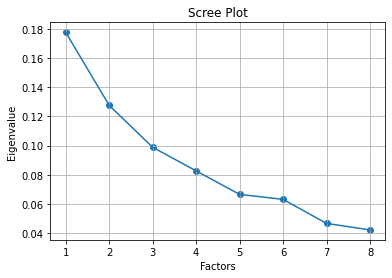

In [418]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,9),importance)
plt.plot(range(1,9),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

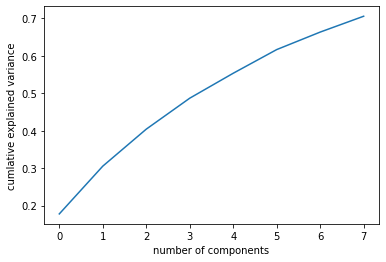

In [419]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [420]:
f=np.cumsum(pca.explained_variance_ratio_)
f

array([0.17757334, 0.30516219, 0.40402311, 0.48675373, 0.55337158,
       0.616596  , 0.66336011, 0.70567653])

# PCA Dimensionality Reduciton Based on # 31 Feaures
# Anormal Activity 

In [224]:
# 29 Feature 

In [225]:
pca = PCA(n_components=29)
principalComponents_anormal_29 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([3.00298219e-01, 1.20955041e-01, 1.01082736e-01, 9.45177085e-02,
       5.76347336e-02, 5.12813604e-02, 3.60655596e-02, 3.40922264e-02,
       3.14780083e-02, 2.89940675e-02, 2.68860445e-02, 2.37164168e-02,
       2.10786358e-02, 1.71341343e-02, 1.57122372e-02, 9.40323064e-03,
       8.61721847e-03, 5.59454153e-03, 5.23109221e-03, 4.69607666e-03,
       3.57840363e-03, 1.61161021e-03, 1.45888608e-04, 8.31354067e-05,
       4.17064330e-05, 2.95069188e-05, 2.50640901e-05, 1.53945945e-05,
       1.57332451e-09])

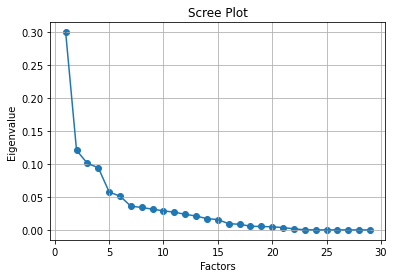

In [226]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,30),importance)
plt.plot(range(1,30),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

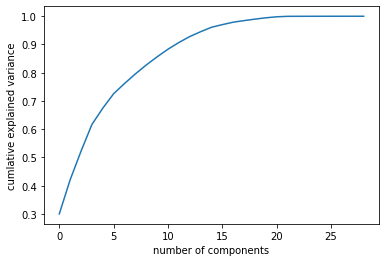

In [227]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [228]:
a_1=np.cumsum(pca.explained_variance_ratio_)
a_1

array([0.30029822, 0.42125326, 0.522336  , 0.6168537 , 0.67448844,
       0.7257698 , 0.76183536, 0.79592758, 0.82740559, 0.85639966,
       0.88328571, 0.90700212, 0.92808076, 0.94521489, 0.96092713,
       0.97033036, 0.97894758, 0.98454212, 0.98977321, 0.99446929,
       0.99804769, 0.9996593 , 0.99980519, 0.99988833, 0.99993003,
       0.99995954, 0.9999846 , 1.        , 1.        ])

In [229]:
#Feature 20

In [230]:
pca = PCA(n_components=20)
principalComponents_anormal_20 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([0.30029822, 0.12095504, 0.10108274, 0.09451771, 0.05763473,
       0.05128136, 0.03606556, 0.03409223, 0.03147801, 0.02899407,
       0.02688604, 0.02371642, 0.02107864, 0.01713413, 0.01571224,
       0.00940323, 0.00861722, 0.00559454, 0.00523109, 0.00469608])

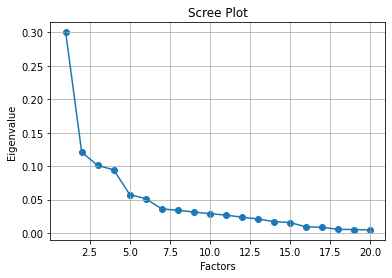

In [231]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,21),importance)
plt.plot(range(1,21),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

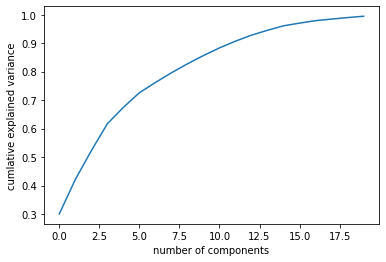

In [232]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [233]:
b_1=np.cumsum(pca.explained_variance_ratio_)
b_1

array([0.30029822, 0.42125326, 0.522336  , 0.6168537 , 0.67448844,
       0.7257698 , 0.76183536, 0.79592758, 0.82740559, 0.85639966,
       0.88328571, 0.90700212, 0.92808076, 0.94521489, 0.96092713,
       0.97033036, 0.97894758, 0.98454212, 0.98977321, 0.99446929])

In [234]:
#18 Feature 

In [235]:
pca = PCA(n_components=18)
principalComponents_anormal_18 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([0.30029822, 0.12095504, 0.10108274, 0.09451771, 0.05763473,
       0.05128136, 0.03606556, 0.03409223, 0.03147801, 0.02899407,
       0.02688604, 0.02371642, 0.02107864, 0.01713413, 0.01571224,
       0.00940323, 0.00861722, 0.00559454])

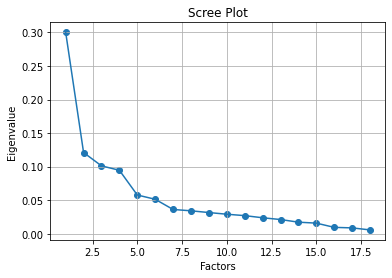

In [236]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,19),importance)
plt.plot(range(1,19),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

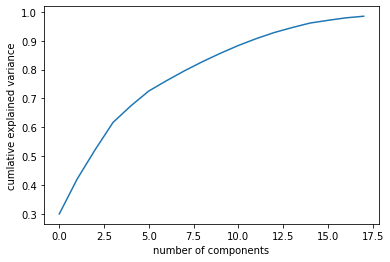

In [237]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [238]:
print(principalComponents_normal_18.shape)

(677785, 18)


In [239]:
c_1=np.cumsum(pca.explained_variance_ratio_)
c_1

array([0.30029822, 0.42125326, 0.522336  , 0.6168537 , 0.67448844,
       0.7257698 , 0.76183536, 0.79592758, 0.82740559, 0.85639966,
       0.88328571, 0.90700212, 0.92808076, 0.94521489, 0.96092713,
       0.97033036, 0.97894758, 0.98454212])

In [240]:
#15 Feature 

In [241]:
pca = PCA(n_components=15)
principalComponents_anormal_15 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([0.30029822, 0.12095504, 0.10108274, 0.09451771, 0.05763473,
       0.05128136, 0.03606556, 0.03409223, 0.03147801, 0.02899407,
       0.02688604, 0.02371642, 0.02107864, 0.01713413, 0.01571224])

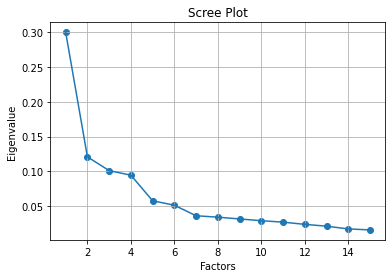

In [242]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,16),importance)
plt.plot(range(1,16),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

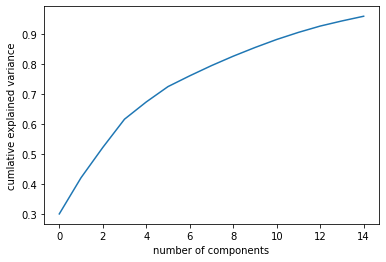

In [243]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [244]:
d_1=np.cumsum(pca.explained_variance_ratio_)
d_1

array([0.30029822, 0.42125326, 0.522336  , 0.6168537 , 0.67448844,
       0.7257698 , 0.76183536, 0.79592758, 0.82740559, 0.85639966,
       0.88328571, 0.90700212, 0.92808076, 0.94521489, 0.96092713])

In [245]:
# 9 Feature 

In [246]:
pca = PCA(n_components=9)
principalComponents_anormal_9 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([0.30029822, 0.12095504, 0.10108274, 0.09451771, 0.05763473,
       0.05128136, 0.03606556, 0.03409223, 0.03147801])

In [247]:
print(principalComponents_normal_9.shape)

(677785, 9)


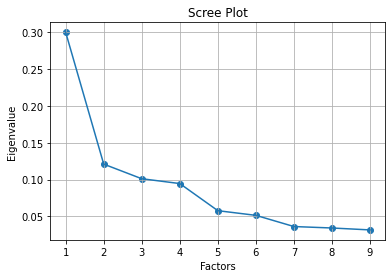

In [248]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,10),importance)
plt.plot(range(1,10),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

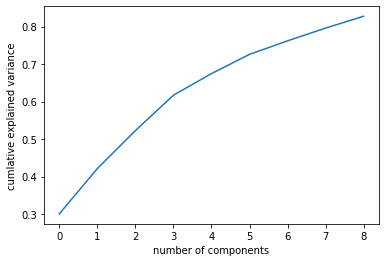

In [249]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [250]:
e_1=np.cumsum(pca.explained_variance_ratio_)
e_1

array([0.30029822, 0.42125326, 0.522336  , 0.6168537 , 0.67448844,
       0.7257698 , 0.76183536, 0.79592758, 0.82740559])

In [ ]:
# 8 Features 

In [421]:
pca = PCA(n_components=8)
principalComponents_anormal_8 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([0.30029822, 0.12095504, 0.10108274, 0.09451771, 0.05763473,
       0.05128136, 0.03606555, 0.03409222])

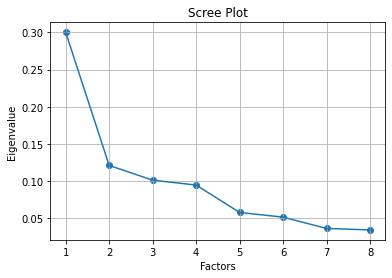

In [422]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,9),importance)
plt.plot(range(1,9),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

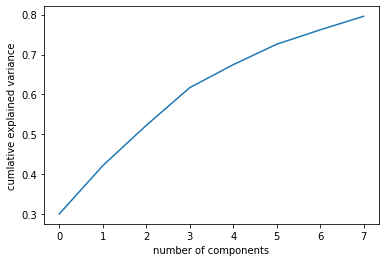

In [423]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [424]:
f_1=np.cumsum(pca.explained_variance_ratio_)
f_1

array([0.30029822, 0.42125326, 0.522336  , 0.6168537 , 0.67448844,
       0.7257698 , 0.76183535, 0.79592757])

# PCA Dimensionality Reduciton _Anormal Data and KNN test 

# 1. PCA-29 FEature Dimensionality _ANoral Dataset 

In [385]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
PCA_29a=principalComponents_anormal_29

In [386]:
# Split the anoraml dataset into training_test 
from sklearn.model_selection import train_test_split
X_29a_train, X_29a_test, y_3_train, y_3_test=train_test_split(PCA_29a, y_3, random_state=0)

In [387]:
knn.fit(X_29a_train, y_3_train)

KNeighborsClassifier(n_neighbors=9)

In [388]:
print("X_29a_train shape",X_29a_train.shape )
print("y_3_train shape",y_3_train.shape )
print("X_29a_test shape",X_29a_test.shape )
print("y_3_test shape",y_3_test.shape )

X_29a_train shape (16661, 29)
y_3_train shape (16661, 9)
X_29a_test shape (5554, 29)
y_3_test shape (5554, 9)


In [389]:
y_pred=knn.predict(X_29a_test)
print("Test set predictions:\n", y_pred)
print("Test score:{:.4f}".format(np.mean(y_pred==y_3_test)))

Test set predictions:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Test score:0.9521


# 2 PCA-20 Anormal Feature 

In [352]:
PCA_20a=principalComponents_anormal_20

In [353]:
y_3

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [354]:
# Split the anoraml dataset into training_test 
from sklearn.model_selection import train_test_split
X_20a_train, X_20a_test, y_3_train, y_3_test=train_test_split(PCA_20a, y_3, random_state=0)

In [355]:
print("X_20a_train shape",X_20a_train.shape )
print("y_3_train shape",y_3_train.shape )

X_20a_train shape (16661, 20)
y_3_train shape (16661, 9)


In [356]:
print("X_20a_test shape",X_20a_test.shape )
print("y_3_test shape",y_3_test.shape )

X_20a_test shape (5554, 20)
y_3_test shape (5554, 9)


In [357]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)

In [358]:
knn.fit(X_20a_train, y_3_train)

KNeighborsClassifier(n_neighbors=9)

In [362]:
y_pred=knn.predict(X_20a_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [364]:
print("Test score:{:.4f}".format(np.mean(y_pred==y_3_test)))

Test score:0.9514


# 3 PCA -15 fEATURE Anoraml Dataset 

In [369]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
PCA_15a=principalComponents_anormal_15

In [370]:
# Split the anoraml dataset into training_test 
from sklearn.model_selection import train_test_split
X_15a_train, X_15a_test, y_3_train, y_3_test=train_test_split(PCA_15a, y_3, random_state=0)

In [371]:
print("X_15a_train shape",X_15a_train.shape )
print("y_3_train shape",y_3_train.shape )
print("X_15a_test shape",X_15a_test.shape )
print("y_3_test shape",y_3_test.shape )

X_15a_train shape (16661, 15)
y_3_train shape (16661, 9)
X_15a_test shape (5554, 15)
y_3_test shape (5554, 9)


In [372]:
knn.fit(X_15a_train, y_3_train)

KNeighborsClassifier(n_neighbors=9)

In [373]:
y_pred=knn.predict(X_15a_test)
print("Test set predictions:\n", y_pred)
print("Test score:{:.4f}".format(np.mean(y_pred==y_3_test)))

Test set predictions:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Test score:0.9513


# 4. PCA 9 Feature Anormal dataset 

In [374]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
PCA_9a=principalComponents_anormal_9

In [375]:
# Split the anoraml dataset into training_test 
from sklearn.model_selection import train_test_split
X_9a_train, X_9a_test, y_3_train, y_3_test=train_test_split(PCA_9a, y_3, random_state=0)

In [376]:
knn.fit(X_9a_train, y_3_train)

KNeighborsClassifier(n_neighbors=9)

In [377]:
y_pred=knn.predict(X_9a_test)
print("Test set predictions:\n", y_pred)
print("Test score:{:.4f}".format(np.mean(y_pred==y_3_test)))

Test set predictions:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Test score:0.9490


In [ ]:
#PCA 8 Features ANormal Dataset

In [425]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
PCA_8a=principalComponents_anormal_8

In [426]:
# Split the anoraml dataset into training_test 
from sklearn.model_selection import train_test_split
X_8a_train, X_8a_test, y_3_train, y_3_test=train_test_split(PCA_8a, y_3, random_state=0)

In [427]:
knn.fit(X_8a_train, y_3_train)

KNeighborsClassifier(n_neighbors=9)

In [428]:
y_pred=knn.predict(X_8a_test)
print("Test set predictions:\n", y_pred)
print("Test score:{:.4f}".format(np.mean(y_pred==y_3_test)))

Test set predictions:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Test score:0.9490


# PCA Dimensionality Reduction Stack ( axis=0) Normal+Anormal

In [ ]:
# 29 Feature Stack 

In [251]:
PCA_29=np.concatenate((principalComponents_normal_29, principalComponents_anormal_29 ),axis=0)

In [252]:
PCA_29

array([[-2.21005256e+00,  6.90822479e-01, -2.63568648e+00, ...,
         5.26209344e-02, -1.25528371e-03,  7.18519716e-03],
       [-1.87492472e+00,  6.94047149e-01, -2.17818441e+00, ...,
         5.30957009e-02, -4.87220329e-03, -2.23112067e-03],
       [-2.04098937e+00,  7.06952272e-01, -2.44783628e+00, ...,
         5.31269977e-02, -3.46021080e-03, -2.26583453e-03],
       ...,
       [ 1.72599996e+00,  8.03016576e-01,  8.00026095e-01, ...,
         3.64592004e-02, -5.15635629e-03,  8.11073908e-06],
       [ 3.05565651e-01, -8.49101403e-02, -2.52105481e-01, ...,
         1.53723292e-02, -7.38640205e-03, -2.25991044e-04],
       [ 2.44493901e+00, -8.19437747e-01,  2.16719476e-01, ...,
         6.59747967e-02, -9.31294866e-03,  1.59411526e-04]])

In [253]:
print(PCA_29.shape)

(700000, 29)


In [ ]:
# 20 Feature Stack 

In [254]:
PCA_20=np.concatenate((principalComponents_normal_20, principalComponents_anormal_20 ),axis=0)

In [255]:
PCA_20

array([[-2.21005256,  0.69082248, -2.63568648, ..., -0.10156532,
         0.1674778 ,  0.20618868],
       [-1.87492472,  0.69404715, -2.17818441, ..., -0.38039541,
         0.66364496,  0.14833142],
       [-2.04098937,  0.70695227, -2.44783628, ..., -0.22926678,
         0.59381649,  0.1702536 ],
       ...,
       [ 1.72599996,  0.80301658,  0.80002609, ..., -1.35441112,
        -0.14503652, -0.19043863],
       [ 0.30556565, -0.08491014, -0.25210548, ..., -0.27335988,
        -0.03992958,  0.14797794],
       [ 2.44493901, -0.81943775,  0.21671948, ..., -1.22762146,
        -0.45138776, -0.19602608]])

In [ ]:
# 18 Feature Stack 

In [256]:
PCA_18=np.concatenate((principalComponents_normal_18, principalComponents_anormal_18 ),axis=0)

In [ ]:
## 15 Feature Stack 

In [257]:
PCA_15=np.concatenate((principalComponents_normal_15, principalComponents_anormal_15 ),axis=0)

In [ ]:
## 9 Feature Stack 

In [258]:
PCA_9=np.concatenate((principalComponents_normal_9, principalComponents_anormal_9 ),axis=0)

In [ ]:
# Target stack

In [278]:
y=np.concatenate((y_1,y_2),axis=0)

In [279]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

# Split the reduction data into training, test

In [ ]:
# 20 PCA Dataset split 

In [282]:
from sklearn.model_selection import train_test_split

In [288]:
X_20F_train, X_20F_test, y_train, y_test=train_test_split(PCA_20,y, random_state=0)

In [289]:
print("X_20F_train shape",X_20F_train.shape )
print("y_train shape",y_train.shape )

X_20F_train shape (525000, 20)
y_train shape (525000, 10)


In [290]:
print("X_20F_test shape",X_20F_test.shape )
print("y_train shape",y_test.shape )

X_20F_test shape (175000, 20)
y_train shape (175000, 10)


In [303]:
# 18 PCA Dataset split 
X_18F_train, X_18F_test, y_train, y_test=train_test_split(PCA_18,y, random_state=0)
print("X_18F_train shape",X_18F_train.shape )
print("y_train shape",y_train.shape )
print("X_18F_test shape",X_18F_test.shape )
print("y_train shape",y_test.shape )

X_18F_train shape (525000, 18)
y_train shape (525000, 10)
X_18F_test shape (175000, 18)
y_train shape (175000, 10)


In [304]:
# 15 PCA Dataset split 
X_15F_train, X_15F_test, y_train, y_test=train_test_split(PCA_15,y, random_state=0)
print("X_15F_train shape",X_15F_train.shape )
print("y_train shape",y_train.shape )
print("X_15F_test shape",X_15F_test.shape )
print("y_train shape",y_test.shape )

X_15F_train shape (525000, 15)
y_train shape (525000, 10)
X_15F_test shape (175000, 15)
y_train shape (175000, 10)


In [305]:
# 9 PCA Dataset split 
X_9F_train, X_9F_test, y_train, y_test=train_test_split(PCA_9,y, random_state=0)
print("X_9F_train shape",X_9F_train.shape )
print("y_train shape",y_train.shape )
print("X_9F_test shape",X_9F_test.shape )
print("y_train shape",y_test.shape )

X_9F_train shape (525000, 9)
y_train shape (525000, 10)
X_9F_test shape (175000, 9)
y_train shape (175000, 10)


# Traing Model KNN

In [393]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)

# 20  Feature Complete Dataset test 

In [298]:
knn.fit(X_20F_train, y_train)

KNeighborsClassifier(n_neighbors=10)

# Evaluating the model 

In [299]:
y_pred=knn.predict(X_20F_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [302]:
print("Test score:{:.4f}".format(np.mean(y_pred==y_test)))

Test score:0.9986


# 18 Feature  Complete dataset

In [394]:
knn.fit(X_18F_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [307]:
y_pred=knn.predict(X_18F_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [308]:
print("Test score:{:.4f}".format(np.mean(y_pred==y_test)))

Test score:0.9986


# 15 Feature Complete dataset

In [365]:
knn.fit(X_15F_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [366]:
y_pred=knn.predict(X_15F_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [367]:
print("Test score:{:.4f}".format(np.mean(y_pred==y_test)))

Test score:0.9986


# 9 Features Complete dataset

In [395]:
knn.fit(X_9F_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [396]:
y_pred=knn.predict(X_9F_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [397]:
print("Test score:{:.4f}".format(np.mean(y_pred==y_test)))

Test score:0.9985
